# Python Project - Correlation in Python 
# In this project I will be working in Python to find correlations between variables.
# Project dataset used kaggle Movie Industry

In [1]:
# Importing libarires

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Jupyter magic command (only works in Jupyter)
%matplotlib inline

# Set plot style and figure size
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# adjusts the configurataion of thr plots we will create


In [2]:
# Read the data

df = pd.read_csv (r"C:\Users\shaik\OneDrive\Desktop\Project complted\Project 4 -Python Project\movies.csv")

In [3]:
# let's look at the data


df = df[sorted(df.columns)]# Importing libarires

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Jupyter magic command (only works in Jupyter)
%matplotlib inline

# Set plot style and figure size
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# adjusts the configurataion of thr plots we will create

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000.0,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772.0,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980
1,4500000.0,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106.0,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980
2,18000000.0,Lucasfilm,United States,Irvin Kershner,Action,538375067.0,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980
3,3500000.0,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539.0,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980
4,6000000.0,Orion Pictures,United States,Harold Ramis,Comedy,39846344.0,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980


In [4]:
# let see if we have missing data

df.isnull().sum()

budget      2171
company       17
country        3
director       0
genre          0
gross        189
name           0
rating        77
released       2
runtime        4
score          3
star           1
votes          3
writer         3
year           0
dtype: int64

In [5]:
df = df.dropna(subset=['runtime', 'company', 'released', 'score', 'votes', 'writer', 'star', 'country'])

In [6]:
df['budget'] = df['budget'].fillna(df['budget'].mean())
df['gross'] = df['gross'].fillna(df['gross'].mean())
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])


In [7]:
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime     float64
score       float64
star         object
votes       float64
writer       object
year          int64
dtype: object

In [8]:
# changing data type
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')


In [9]:
df.dtypes

budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime     float64
score       float64
star         object
votes       float64
writer       object
year          int64
dtype: object

In [10]:
df['released']

0          June 13, 1980 (United States)
1           July 2, 1980 (United States)
2          June 20, 1980 (United States)
3           July 2, 1980 (United States)
4          July 25, 1980 (United States)
                      ...               
7658    February 7, 2020 (United States)
7659       March 3, 2020 (United States)
7660    November 5, 2020 (United States)
7664    February 7, 2020 (United States)
7667     August 19, 2020 (United States)
Name: released, Length: 7643, dtype: object

In [11]:
# Step 1: Remove the country part
df['released_clean'] = df['released'].str.replace(r"\s*\(.*\)", "", regex=True)
df = df.drop(columns =['released'])
df = df.rename(columns={'released_clean': 'released'})

In [12]:
df.head()

,budget,company,country,director,genre,gross,name,rating,runtime,score,star,votes,writer,year,released
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980,"June 13, 1980"
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980,"July 2, 1980"
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980,"June 20, 1980"
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980,"July 2, 1980"
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980,"July 25, 1980"


In [13]:
#create correct year column
df['year_correct'] = df['released'].astype(str).str[-4:]

In [14]:
#df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [15]:
#df = df[sorted(df.columns)]

In [16]:
df.head()

,budget,company,country,director,genre,gross,name,rating,runtime,score,star,votes,writer,year,released,year_correct
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980,"June 13, 1980",1980
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980,"July 2, 1980",1980
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980,"June 20, 1980",1980
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980,"July 2, 1980",1980
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980,"July 25, 1980",1980


In [17]:
#pd.set_option('display.max_rows', None)

In [18]:
#df['company'].drop_duplicates().sort_values(ascending=False)

In [19]:
#budget hight correlation
# company will have a high correlation
# this is what i think look at the data

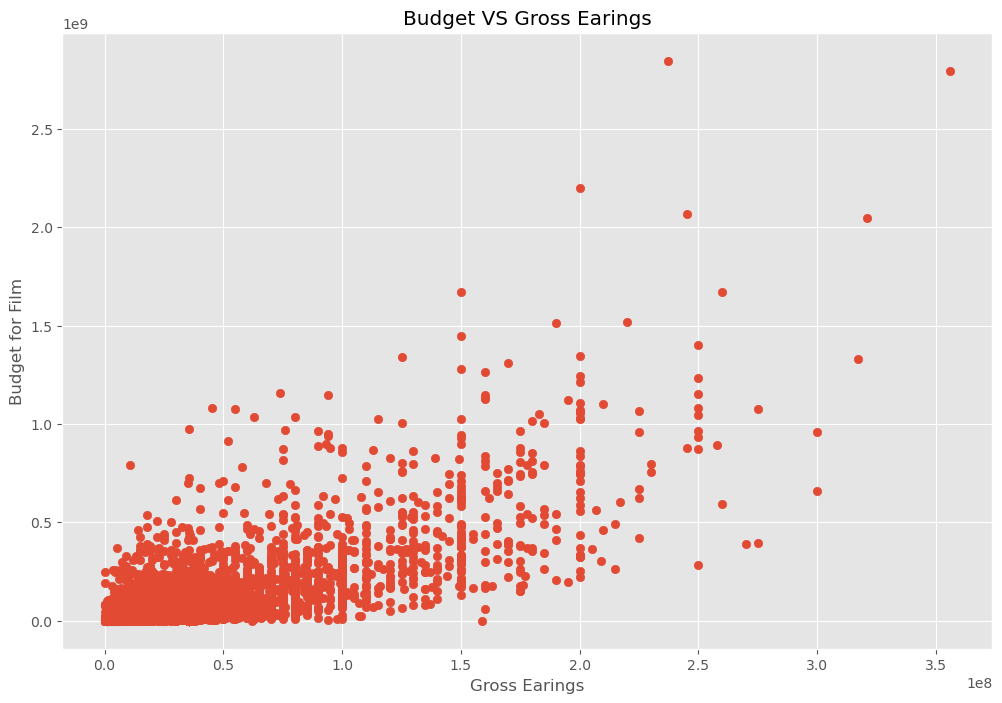

In [20]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget VS Gross Earings')
plt.xlabel('Gross Earings')
plt.ylabel('Budget for Film')
plt.show()

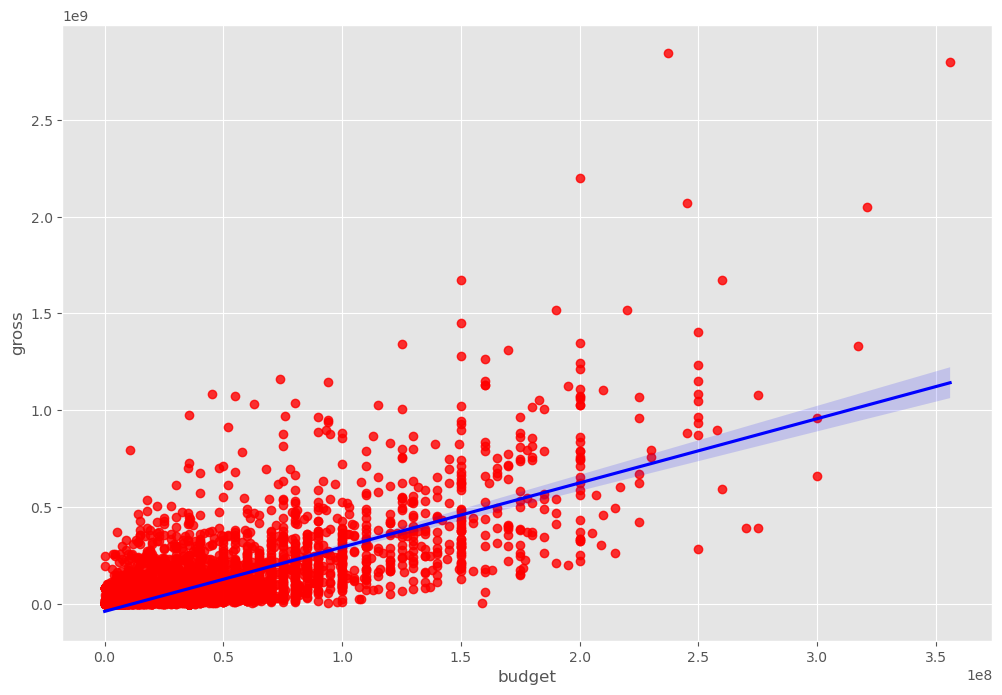

In [21]:
# plot budget vs gross using seaborn

sns.regplot(
    x='budget',
    y='gross',
    data=df,
    scatter_kws={"color": "red"},
    line_kws={"color": "blue"}
)
plt.show()

In [22]:
# lets look at correlation

#df.corr() # pearson, kendall, spearman
df.corr(numeric_only=True)

,budget,gross,runtime,score,votes,year
budget,1.000000,0.711538,0.265068,0.064176,0.420751,0.267135
gross,0.711538,1.000000,0.241290,0.182861,0.628735,0.252422
runtime,0.265068,0.241290,1.000000,0.399965,0.308907,0.119789
score,0.064176,0.182861,0.399965,1.000000,0.409432,0.098278
votes,0.420751,0.628735,0.308907,0.409432,1.000000,0.223353
year,0.267135,0.252422,0.119789,0.098278,0.223353,1.000000


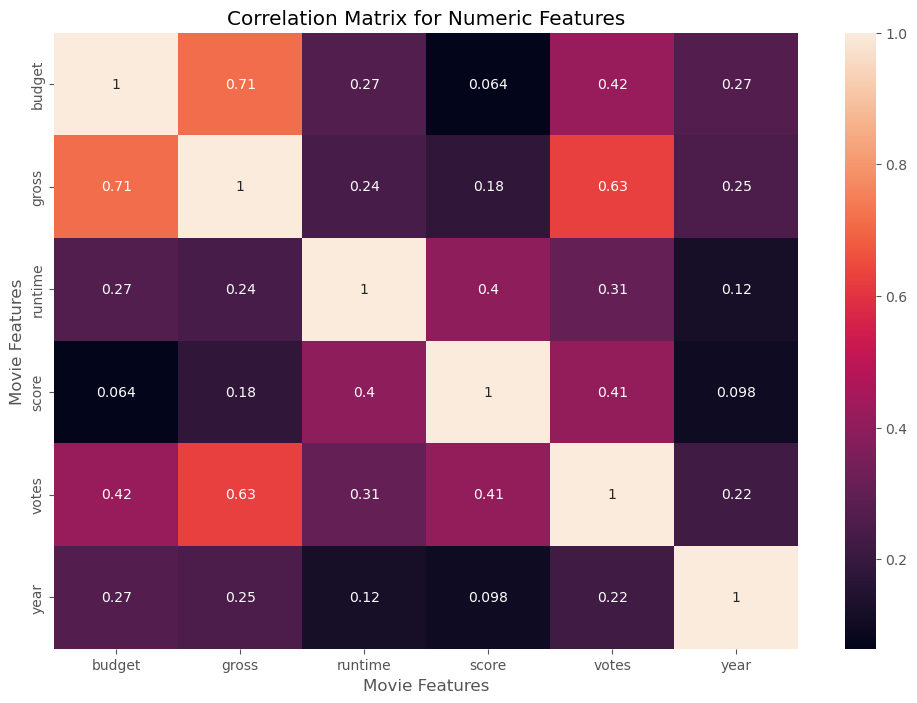

In [23]:
correlation_matrix = df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)
plt.xlabel
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [24]:
# looks at company 
df.head()

,budget,company,country,director,genre,gross,name,rating,runtime,score,star,votes,writer,year,released,year_correct
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980,"June 13, 1980",1980
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980,"July 2, 1980",1980
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980,"June 20, 1980",1980
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980,"July 2, 1980",1980
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980,"July 25, 1980",1980


In [25]:
# converting object to int 
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized 

,budget,company,country,director,genre,gross,name,rating,runtime,score,star,votes,writer,year,released,year_correct
0,19000000,2312,54,2577,6,46998772,6566,6,146.0,8.4,1041,927000.0,3999,1980,1507,0
1,4500000,727,55,2260,1,58853106,5555,6,104.0,5.8,325,65000.0,1628,1980,1308,0
2,18000000,1533,55,1109,0,538375067,5126,4,124.0,8.7,1737,1200000.0,2558,1980,1565,0
3,3500000,1805,55,1297,4,83453539,285,4,88.0,7.7,2236,221000.0,1994,1980,1308,0
4,6000000,1770,55,1052,4,39846344,1026,6,98.0,7.3,408,108000.0,518,1980,1357,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7658,5000,1741,55,1761,6,78614324,797,6,78.0,6.6,527,35.0,1065,2020,972,40
7659,35651716,1985,55,1605,9,13266,2648,3,87.0,3.4,1526,447.0,2457,2020,1889,40
7660,35651716,83,55,2579,4,78614324,337,6,90.0,7.1,194,14.0,3976,2020,2411,40
7664,35651716,535,55,773,4,78614324,1676,6,90.0,4.7,1878,36.0,2605,2020,972,40


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7643 entries, 0 to 7667
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        7643 non-null   int64  
 1   company       7643 non-null   int16  
 2   country       7643 non-null   int8   
 3   director      7643 non-null   int16  
 4   genre         7643 non-null   int8   
 5   gross         7643 non-null   int64  
 6   name          7643 non-null   int16  
 7   rating        7643 non-null   int8   
 8   runtime       7643 non-null   float64
 9   score         7643 non-null   float64
 10  star          7643 non-null   int16  
 11  votes         7643 non-null   float64
 12  writer        7643 non-null   int16  
 13  year          7643 non-null   int64  
 14  released      7643 non-null   int16  
 15  year_correct  7643 non-null   int8   
dtypes: float64(3), int16(6), int64(3), int8(4)
memory usage: 537.4 KB


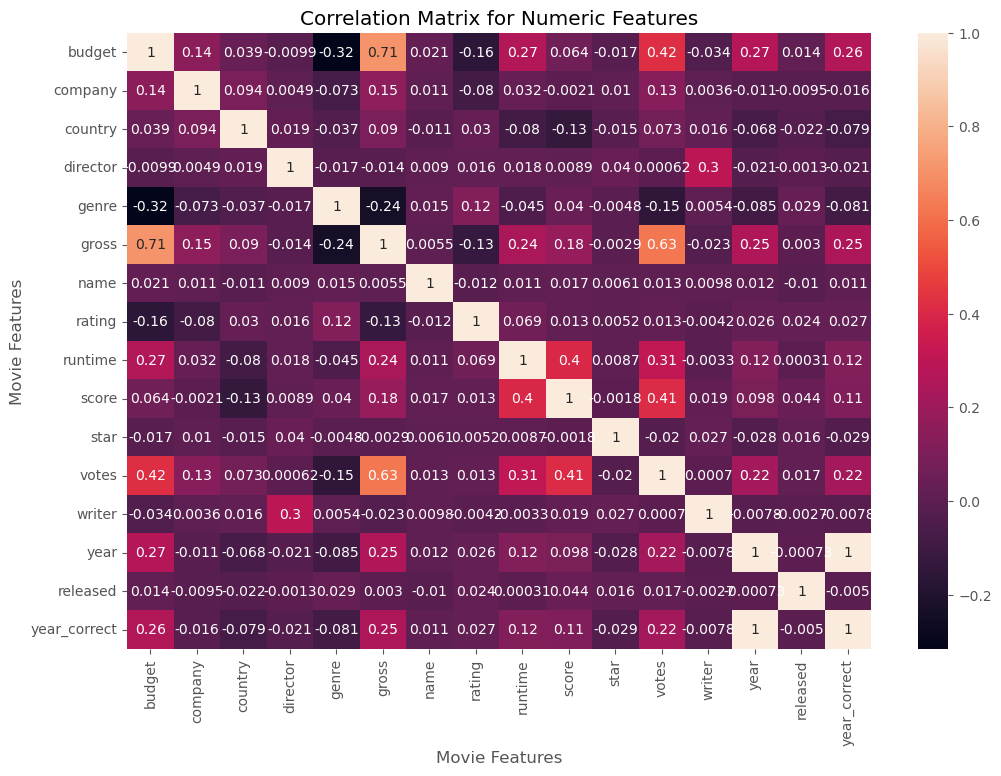

In [27]:
correlation_matrix = df_numerized.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)
plt.xlabel
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [28]:
df_numerized.corr()

,budget,company,country,director,genre,gross,name,rating,runtime,score,star,votes,writer,year,released,year_correct
budget,1.000000,0.143732,0.038695,-0.009921,-0.315621,0.711538,0.020787,-0.156808,0.265068,0.064176,-0.017418,0.420751,-0.033514,0.267135,0.014326,0.261050
company,0.143732,1.000000,0.093813,0.004879,-0.072765,0.152373,0.010557,-0.080289,0.031965,-0.002070,0.010235,0.131659,0.003574,-0.010606,-0.009460,-0.015863
country,0.038695,0.093813,1.000000,0.019410,-0.036919,0.090476,-0.011042,0.030110,-0.080025,-0.133115,-0.014582,0.073448,0.015722,-0.068436,-0.021793,-0.079083
director,-0.009921,0.004879,0.019410,1.000000,-0.016630,-0.014389,0.008970,0.016048,0.017980,0.008872,0.039811,0.000622,0.299397,-0.021358,-0.001343,-0.021014
genre,-0.315621,-0.072765,-0.036919,-0.016630,1.000000,-0.237932,0.015231,0.120671,-0.045087,0.039793,-0.004816,-0.150201,0.005389,-0.084693,0.029310,-0.080926
gross,0.711538,0.152373,0.090476,-0.014389,-0.237932,1.000000,0.005513,-0.130516,0.241290,0.182861,-0.002937,0.628735,-0.023203,0.252422,0.003005,0.245780
name,0.020787,0.010557,-0.011042,0.008970,0.015231,0.005513,1.000000,-0.012432,0.010673,0.016603,0.006140,0.013239,0.009833,0.011931,-0.010381,0.011333
rating,-0.156808,-0.080289,0.030110,0.016048,0.120671,-0.130516,-0.012432,1.000000,0.068676,0.013400,0.005230,0.013421,-0.004213,0.026167,0.023619,0.026699
runtime,0.265068,0.031965,-0.080025,0.017980,-0.045087,0.241290,0.010673,0.068676,1.000000,0.399965,0.008732,0.308907,-0.003251,0.119789,0.000305,0.119595
score,0.064176,-0.002070,-0.133115,0.008872,0.039793,0.182861,0.016603,0.013400,0.399965,1.000000,-0.001797,0.409432,0.019022,0.098278,0.043849,0.106108


In [29]:
correlation_mat = df_numerized.corr()

corr_pairs= correlation_mat.unstack()

corr_pairs

budget        budget          1.000000
              company         0.143732
              country         0.038695
              director       -0.009921
              genre          -0.315621
                                ...   
year_correct  votes           0.218802
              writer         -0.007840
              year            0.997401
              released       -0.005010
              year_correct    1.000000
Length: 256, dtype: float64

In [30]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget        genre          -0.315621
genre         budget         -0.315621
              gross          -0.237932
gross         genre          -0.237932
rating        budget         -0.156808
                                ...   
score         score           1.000000
year          year            1.000000
writer        writer          1.000000
released      released        1.000000
year_correct  year_correct    1.000000
Length: 256, dtype: float64

In [31]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross         votes           0.628735
votes         gross           0.628735
gross         budget          0.711538
budget        gross           0.711538
year          year_correct    0.997401
year_correct  year            0.997401
rating        rating          1.000000
name          name            1.000000
genre         genre           1.000000
gross         gross           1.000000
company       company         1.000000
budget        budget          1.000000
country       country         1.000000
director      director        1.000000
votes         votes           1.000000
star          star            1.000000
runtime       runtime         1.000000
score         score           1.000000
year          year            1.000000
writer        writer          1.000000
released      released        1.000000
year_correct  year_correct    1.000000
dtype: float64

In [32]:
# Votes and budget have the highest correlation to gross earning 
# company has low correlation
# i was wrong 